In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price-prediction-dataset/House Price Prediction Dataset.csv


Using CSV: /kaggle/input/house-price-prediction-dataset/House Price Prediction Dataset.csv
Columns found: ['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Location', 'Condition', 'Garage', 'Price']
Features used: ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Location', 'Condition', 'Garage']
Target: Price
Examples: 2000, Features: 8

MULTIVARIATE LINEAR REGRESSION - HOUSE PRICE
θ0 (intercept) = 537676.855000
θ 1 (Area      ) = 393.874006
θ 2 (Bedrooms  ) = -1126.558049
θ 3 (Bathrooms ) = -4697.168336
θ 4 (Floors    ) = 15599.988417
θ 5 (YearBuilt ) = 1551.004377
θ 6 (Location  ) = -4985.401158
θ 7 (Condition ) = -2465.085612
θ 8 (Garage    ) = 513.210695
Final cost J = 38038706241.502213
R² on training set = 0.0039


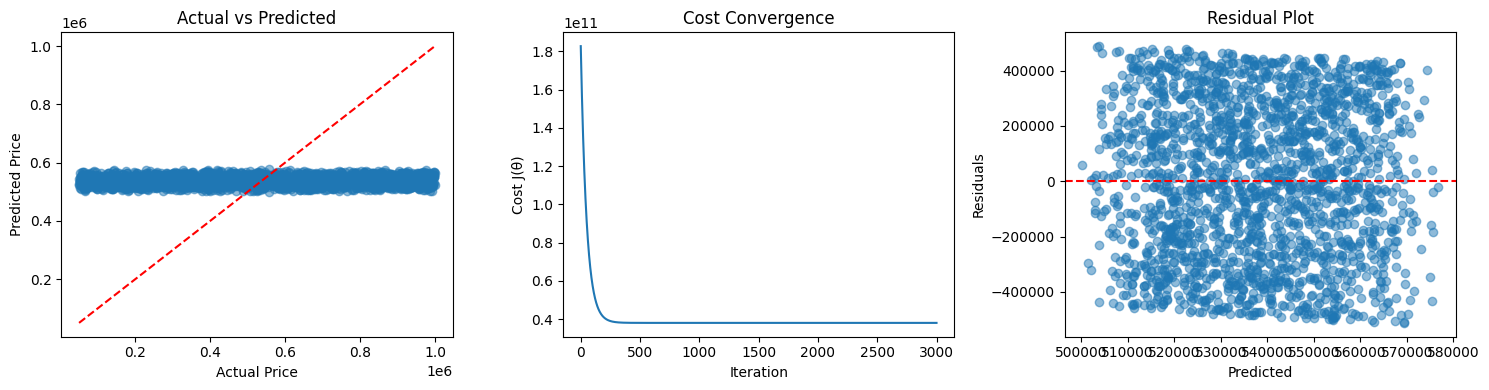


Sample house prediction:
Predicted Price = $534,800.68


In [2]:
# Simple Multivariate Linear Regression (Kaggle-ready, minimal & clear)
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- find CSV in /kaggle/input ---
candidates = glob.glob('/kaggle/input/**/*.csv', recursive=True)
if not candidates:
    raise FileNotFoundError("No CSV found in /kaggle/input. Use 'Add data' to attach the dataset.")
csv_path = candidates[0]
print("Using CSV:", csv_path)

# --- load data ---
df = pd.read_csv(csv_path)
print("Columns found:", df.columns.tolist())

# --- simple encoding for categorical columns (adjust maps to match your CSV) ---
location_map  = {'Downtown': 4, 'Urban': 3, 'Suburban': 2, 'Rural': 1}
condition_map = {'Excellent': 4, 'Good': 3, 'Fair': 2, 'Poor': 1}
garage_map    = {'Yes': 1, 'No': 0}

# If the named columns exist, map; otherwise assume the dataset already has numeric encodings
if 'Location' in df.columns:
    df['Location'] = df['Location'].map(location_map).fillna(0)
if 'Condition' in df.columns:
    df['Condition'] = df['Condition'].map(condition_map).fillna(0)
if 'Garage' in df.columns:
    df['Garage'] = df['Garage'].map(garage_map).fillna(0)

# --- pick features and target (adjust names if your CSV differs) ---
feature_names = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Location', 'Condition', 'Garage']
# fallback: choose first 8 numeric columns if named ones not present
if not all(name in df.columns for name in feature_names):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if len(numeric_cols) < 2:
        raise ValueError("Not enough numeric columns found. Check your CSV.")
    # assume last numeric column is Price/target
    feature_names = numeric_cols[:-1][:8]              # up to 8 features
    target_name = numeric_cols[-1]
else:
    target_name = 'Price'

print("Features used:", feature_names)
print("Target:", target_name)

X = df[feature_names].values.astype(float)
y = df[target_name].values.astype(float)

m, n = X.shape
print(f"Examples: {m}, Features: {n}")

# --- feature normalization (save mean & std for later use) ---
X_mean = X.mean(axis=0)
X_std  = X.std(axis=0)
# avoid division by zero
X_std[X_std == 0] = 1.0
X_norm = (X - X_mean) / X_std

# add bias column
X_b = np.c_[np.ones(m), X_norm]   # shape (m, n+1)

# --- initialize and hyperparams ---
theta = np.zeros(n + 1)
alpha = 0.01      # learning rate (tweak if needed)
iterations = 3000

# --- vectorized gradient descent ---
J_history = []
for i in range(iterations):
    preds = X_b.dot(theta)            # (m,)
    error = preds - y
    J = (1 / (2 * m)) * np.sum(error ** 2)
    J_history.append(J)
    grad = (1 / m) * X_b.T.dot(error) # (n+1,)
    theta = theta - alpha * grad

# --- results ---
print("\n" + "="*60)
print("MULTIVARIATE LINEAR REGRESSION - HOUSE PRICE")
print("="*60)
print(f"θ0 (intercept) = {theta[0]:.6f}")
for i, name in enumerate(feature_names):
    print(f"θ{i+1:>2} ({name:10s}) = {theta[i+1]:.6f}")
print(f"Final cost J = {J_history[-1]:.6f}")

# predictions on training set
preds = X_b.dot(theta)

# R-squared
SS_res = np.sum((y - preds) ** 2)
SS_tot = np.sum((y - np.mean(y)) ** 2)
R2 = 1 - (SS_res / SS_tot)
print(f"R² on training set = {R2:.4f}")

# --- plots ---
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.scatter(y, preds, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted')

plt.subplot(1,3,2)
plt.plot(range(1, iterations+1), J_history)
plt.xlabel('Iteration')
plt.ylabel('Cost J(θ)')
plt.title('Cost Convergence')

plt.subplot(1,3,3)
residuals = y - preds
plt.scatter(preds, residuals, alpha=0.5)
plt.axhline(0, linestyle='--', color='r')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# --- sample prediction (normalize with same mean/std) ---
sample_house = np.array([2500, 3, 2, 2, 2000, 4, 3, 1], dtype=float)  # adjust length/order if needed
if sample_house.shape[0] != n:
    print("Sample length does not match number of features. Skipping sample prediction.")
else:
    sample_norm = (sample_house - X_mean) / X_std
    sample_b = np.r_[1.0, sample_norm]   # add bias
    predicted_price = sample_b.dot(theta)
    print("\nSample house prediction:")
    print(f"Predicted Price = ${predicted_price:,.2f}")
